# Read and inspect SML data from HD rain
This script reads and plots sample of SML data from satellite link with terminal operated by HD rain. Data are from the OPENSENSE GDrive repo. Furthermore, rain-gauge data from Hourly-GLobal dataset of NOAA are used as a reference.


## Source functions, load libraries, configure time zone

In [5]:
Sys.setenv(tz = 'UTC')
source('fun_SMLs.R')
library(zoo)

## Read and reformate data

### Read SML data&metadata

In [6]:
# Read SML metadata
id <- '16zLpGunEznvCnAjQ2efOwMvOb_TB3Zbu'
metaSML <- read.table(sprintf("https://docs.google.com/uc?id=%s&export=download", id),
                   sep = ';', header = T)
# Read SML data
id <- "1VGR7GcRpwnqufD0MziGIunUU1Orm9JSo"
DF <- read.table(sprintf("https://docs.google.com/uc?id=%s&export=download", id),
                 header = T, sep = ';')
sml <- zoo(DF[, 2], as.POSIXct(DF[, 1]))

### Read rain-gauge data

In [7]:
fnams <- c('1QmfDeqOIcHcEPWFEHw9uF4XkB_Ur3SmZ',
           '1_sXs6GaZi9xKgpqm47kDXfiHPWWKkz87')

rgList <- list()
for (i in 1 : 2) {
  meteo <- read.table(sprintf("https://docs.google.com/uc?id=%s&export=download", fnams[i]), sep = ',', header = T)
  tim <- as.POSIXct(meteo$DATE, format = "%Y-%m-%dT%H:%M:%S")
  rgMtx <- split_strings(meteo, 'AA1')
  rg <- zoo(as.numeric(rgMtx[, 2]), tim)
  rg <- rg[!is.na(rgMtx[, 2])]
  rg[rg == 9999] <- NA
  rgList[[i]] <- rg / 10
}

Warning message in zoo(as.numeric(rgMtx[, 2]), tim):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(as.numeric(rgMtx[, 2]), tim):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"


## Plot SML data

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""axes" is not a graphical parameter"


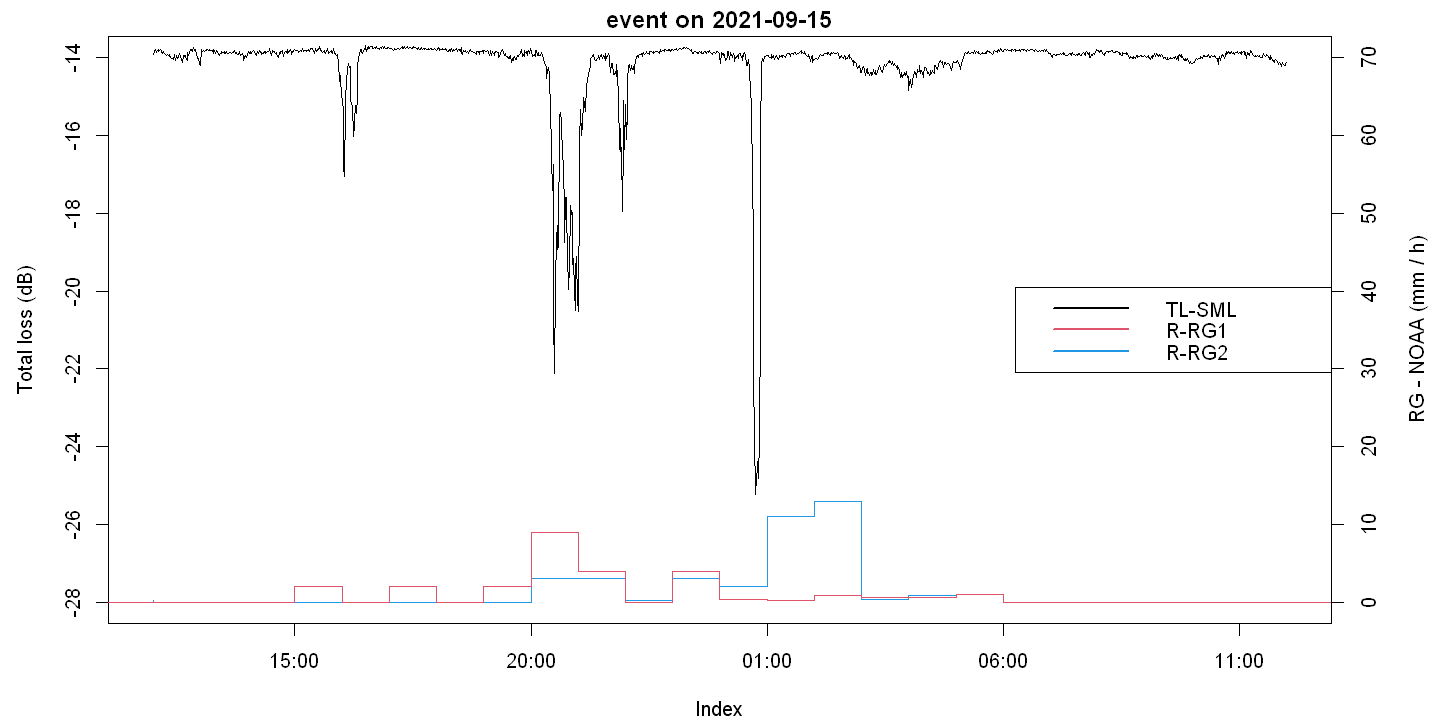

In [15]:
options(repr.plot.width = 12, repr.plot.height = 6)
par (mar = c(4, 4.5, 1.5, 4.5))
plot(sml, ylab = 'Total loss (dB)', main = 'event on 2021-09-15',
     ylim = c(-28, -14))
par(new = T)

plot(window(rgList[[1]], start = start(sml), end = end(sml)), col = 4,
     type = 'S', ylim = c(0, 70), axes = F, ylab = '')
lines(rgList[[2]], col = 2, type = 'S')

axis(4)
mtext('RG - NOAA (mm / h)', 4, 3)
legend('right', c("TL-SML", 'R-RG1', 'R-RG2'), col = c(1,2,4), lwd = 2)